<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-1">Data Preparation</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-2">Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#New-dataframes" data-toc-modified-id="New-dataframes-2.1">New dataframes</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Side-note---Series" data-toc-modified-id="Side-note---Series-2.1.0.1">Side note - Series</a></span></li></ul></li><li><span><a href="#New-dataframe-based-on-columns-(selecting)" data-toc-modified-id="New-dataframe-based-on-columns-(selecting)-2.1.1">New dataframe based on columns (selecting)</a></span><ul class="toc-item"><li><span><a href="#Select-using-column-names" data-toc-modified-id="Select-using-column-names-2.1.1.1">Select using column names</a></span></li><li><span><a href="#Select-using-.loc[-]" data-toc-modified-id="Select-using-.loc[-]-2.1.1.2">Select using .loc[ ]</a></span></li><li><span><a href="#Select-using-.iloc[-]" data-toc-modified-id="Select-using-.iloc[-]-2.1.1.3">Select using .iloc[ ]</a></span></li></ul></li><li><span><a href="#New-dataframe-based-on-rows-(slicing)" data-toc-modified-id="New-dataframe-based-on-rows-(slicing)-2.1.2">New dataframe based on rows (slicing)</a></span><ul class="toc-item"><li><span><a href="#When-a-column-is-used-as-the-row-index" data-toc-modified-id="When-a-column-is-used-as-the-row-index-2.1.2.1">When a column is used as the row index</a></span></li><li><span><a href="#Slice-using-iloc[-]" data-toc-modified-id="Slice-using-iloc[-]-2.1.2.2">Slice using iloc[ ]</a></span></li></ul></li><li><span><a href="#New-dataframe-based-on-rows-and-columns-(indexing)" data-toc-modified-id="New-dataframe-based-on-rows-and-columns-(indexing)-2.1.3">New dataframe based on rows and columns (indexing)</a></span></li><li><span><a href="#New-dataframe-based-on-row-filtering" data-toc-modified-id="New-dataframe-based-on-row-filtering-2.1.4">New dataframe based on row filtering</a></span></li></ul></li></ul></li><li><span><a href="#New-Columns" data-toc-modified-id="New-Columns-3">New Columns</a></span></li><li><span><a href="#Group-By" data-toc-modified-id="Group-By-4">Group By</a></span><ul class="toc-item"><li><span><a href="#Basics" data-toc-modified-id="Basics-4.1">Basics</a></span></li><li><span><a href="#Create-a-new-dataframe-for-grouped-data" data-toc-modified-id="Create-a-new-dataframe-for-grouped-data-4.2">Create a new dataframe for grouped data</a></span></li></ul></li><li><span><a href="#Using-the-penguin-dataset" data-toc-modified-id="Using-the-penguin-dataset-5">Using the penguin dataset</a></span></li><li><span><a href="#Transforming-Data" data-toc-modified-id="Transforming-Data-6">Transforming Data</a></span></li><li><span><a href="#Filtering-data" data-toc-modified-id="Filtering-data-7">Filtering data</a></span></li><li><span><a href="#Group-by-multiple-categories" data-toc-modified-id="Group-by-multiple-categories-8">Group by multiple categories</a></span></li><li><span><a href="#Group-by-numerical-data-using-.cut()-and-.qcut()" data-toc-modified-id="Group-by-numerical-data-using-.cut()-and-.qcut()-9">Group by numerical data using .cut() and .qcut()</a></span></li><li><span><a href="#Return-to-the-Beer-notebook-and-complete-part-2" data-toc-modified-id="Return-to-the-Beer-notebook-and-complete-part-2-10">Return to the Beer notebook and complete part 2</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.random import randn
pd.set_option("display.precision", 1)
sns.set_style('white')

import warnings

warnings.filterwarnings("ignore")

In [2]:
df_original = pd.read_csv('https://raw.githubusercontent.com/jimcody2014/python_data/refs/heads/main/diabetes_inspect.csv')

In [3]:
df_original.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glipizide,glyburide,tolbutamide,miglitol,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,xyz,?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,NaN,?,1,1,7,3,...,No,No,No,No,Up,No,No,No,Yes,>30
2,64410,86047875,AfricanAmerican,female,[20-30),?,1,1,7,2,...,Steady,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Mle,[30-40),?,1,1,7,2,...,No,No,No,No,Up,No,No,No,Yes,NO
4,16680,42519267,Caucasian,M,[40-50),?,1,1,7,1,...,Steady,No,No,No,Steady,No,No,No,Yes,NO


# Data Preparation

In [4]:
df = df_original

In [5]:
df.drop_duplicates(keep = 'first', inplace = True)

df['encounter_id'] = df['encounter_id'].astype(str)
df['patient_nbr'] = df['patient_nbr'].astype(str)
df['admission_type_id'] = df['admission_type_id'].astype(str)
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype(str)
df['admission_source_id'] = df['admission_source_id'].astype(str)

short_names = {'admission_type_id':'admin_type', # creating a dict of the names to be changed
               'discharge_disposition_id':'discharge_dispo',
               'admission_source_id':'admin_source',
               'num_lab_procedures':'lab_procedures',
               'num_procedures':'procedures'}

df.rename(columns=short_names, inplace=True)
no_age = df[df['age'].isnull()].index
drop_columns = {'medical_specialty','glyburide-metformin','glipizide-metformin',
                'glimepiride-pioglitazone', 'payer_code', 'weight'}
df = df.drop(columns = drop_columns)

df.num_medications.fillna( df.num_medications.mean(),inplace=True )
df['gender'] = df['gender'].replace({'M':'Male', 'Mle':'Male', 'F':'Female'})
df['gender'] = df['gender'].apply(lambda x:x.lower())
df['gender'] = df['gender'].replace({'?':'male', 'unknown/invalid':'male'})   
df = df.loc[df['age']!= 'xyz']
df = df.loc[df.gender != '?']
df = df.drop(no_age, axis = 0) 
df2 = df                           # This is used for new dataframe examples

In [6]:
data = {
    'Weather': ['Sunny','Sunny','Sunny','Cloudy','Shower','Shower','Sunny'], 
    'Temperature': [78,76,78,68,70,71,82],
    'Wind': [13,28,16,11,26,27,20],
    'Humidity': [30,96,20,22,79,62,10],
}
weather = pd.DataFrame(data, index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Feature Engineering

- New dataframes
    - a subset of columns
    - a subset of rows
- New columns

![subset-dataframe.png](images/subset-dataframe.png)

## New dataframes

In [7]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'admin_type',
       'discharge_dispo', 'admin_source', 'time_in_hospital', 'lab_procedures',
       'procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'max_glu_serum',
       'A1Cresult', 'metformin', 'glimepiride', 'glipizide', 'glyburide',
       'tolbutamide', 'miglitol', 'insulin', 'diabetesMed', 'readmitted'],
      dtype='object')

### New dataframe based on columns (selecting)

#### Select using column names

In [8]:
medications = df[['miglitol', 'insulin', 'glipizide']] # Notice that the columns are passed in as a list
print(type(medications))
print()
print(medications.info())

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>
Index: 101764 entries, 2 to 101765
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   miglitol   101764 non-null  object
 1   insulin    101764 non-null  object
 2   glipizide  101764 non-null  object
dtypes: object(3)
memory usage: 3.1+ MB
None


In [9]:
medications.shape

(101764, 3)

#### Select using .loc[ ]

In [10]:
medications2 = df.loc[:,['insulin', 'miglitol']] # Notice that the columns are passed in as a list
print(type(medications2))
print()
print(medications2.info())

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>
Index: 101764 entries, 2 to 101765
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   insulin   101764 non-null  object
 1   miglitol  101764 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB
None


#### Select using .iloc[ ]

In [11]:
medications3 = df.iloc[:,[23,24]] # Notice that the columns are passed in as a list
print(type(medications3))
print()
print(medications3.info())

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>
Index: 101764 entries, 2 to 101765
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   miglitol  101764 non-null  object
 1   insulin   101764 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB
None


In [12]:
medications4 = df.iloc[:,18:25] # Notice that the columns are NOT passed in as a list (because of slicing (the colon))
print(type(medications4))
print()
print(medications4.info())

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>
Index: 101764 entries, 2 to 101765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   metformin    101764 non-null  object
 1   glimepiride  101764 non-null  object
 2   glipizide    101764 non-null  object
 3   glyburide    101764 non-null  object
 4   tolbutamide  101764 non-null  object
 5   miglitol     101764 non-null  object
 6   insulin      101764 non-null  object
dtypes: object(7)
memory usage: 6.2+ MB
None


In [13]:
del medications
del medications2
del medications3
del medications4

### New dataframe based on rows (slicing)

In [14]:
weather.head(10)

,Weather,Temperature,Wind,Humidity
Mon,Sunny,78,13,30
Tue,Sunny,76,28,96
Wed,Sunny,78,16,20
Thu,Cloudy,68,11,22
Fri,Shower,70,26,79
Sat,Shower,71,27,62
Sun,Sunny,82,20,10


#### When a column is used as the row index

In [15]:
rows1 = weather.loc[['Tue', 'Thu', 'Sun']]
rows1

,Weather,Temperature,Wind,Humidity
Tue,Sunny,76,28,96
Thu,Cloudy,68,11,22
Sun,Sunny,82,20,10


#### Slice using iloc[ ]

In [16]:
rows2 = df.iloc[[2,4,6],]  # Notice, you do not need the colon
print(type(rows2))
print()
print(rows2.shape)

<class 'pandas.core.frame.DataFrame'>

(3, 27)


In [17]:
rows3 = df.iloc[3:20,]  # Notice, you do not need the colon
print(type(rows3))
print()
print(rows3.shape)

<class 'pandas.core.frame.DataFrame'>

(17, 27)


### New dataframe based on rows and columns (indexing)

In [18]:
rows4 = df.iloc[3:20,5:10] 
print(type(rows4))
print()
print(rows4.shape)

<class 'pandas.core.frame.DataFrame'>

(17, 5)


In [19]:
rows4

,admin_type,discharge_dispo,admin_source,time_in_hospital,lab_procedures
5,2,1,2,3,31
6,3,1,2,4,70
7,1,1,7,5,73
8,2,1,4,13,68
9,3,3,4,12,33
10,1,1,7,9,47
11,2,1,4,7,62
12,1,3,7,7,60
13,1,6,7,10,55
14,3,1,2,1,49


In [20]:
rows5 = df.loc[3:20,['insulin','miglitol']] 
print(type(rows5))
print()
print(rows5.shape)

<class 'pandas.core.frame.DataFrame'>

(18, 2)


In [21]:
df.head(20)

,encounter_id,patient_nbr,race,gender,age,admin_type,discharge_dispo,admin_source,time_in_hospital,lab_procedures,...,A1Cresult,metformin,glimepiride,glipizide,glyburide,tolbutamide,miglitol,insulin,diabetesMed,readmitted
2,64410,86047875,AfricanAmerican,female,[20-30),1,1,7,2,11,...,NaN,No,No,Steady,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,male,[30-40),1,1,7,2,44,...,NaN,No,No,No,No,No,No,Up,Yes,NO
4,16680,42519267,Caucasian,male,[40-50),1,1,7,1,51,...,NaN,No,No,Steady,No,No,No,Steady,Yes,NO
5,35754,82637451,Caucasian,male,[50-60),2,1,2,3,31,...,NaN,No,No,No,No,No,No,Steady,Yes,>30
6,55842,84259809,Caucasian,male,[60-70),3,1,2,4,70,...,NaN,Steady,Steady,No,No,No,No,Steady,Yes,NO
7,63768,114882984,Caucasian,male,[70-80),1,1,7,5,73,...,NaN,No,No,No,Steady,No,No,No,Yes,>30
8,12522,48330783,Caucasian,female,[80-90),2,1,4,13,68,...,NaN,No,No,Steady,No,No,No,Steady,Yes,NO
9,15738,63555939,Caucasian,female,[90-100),3,3,4,12,33,...,NaN,No,No,No,No,No,No,Steady,Yes,NO
10,28236,89869032,AfricanAmerican,female,[40-50),1,1,7,9,47,...,NaN,No,No,No,No,No,No,Steady,Yes,>30
11,36900,77391171,AfricanAmerican,male,[60-70),2,1,4,7,62,...,NaN,No,No,No,Up,No,No,Steady,Yes,<30


### New dataframe based on row filtering

In [22]:
df['A1Cresult'] == 'None'

2         False
3         False
4         False
5         False
6         False
          ...  
101761    False
101762    False
101763    False
101764    False
101765    False
Name: A1Cresult, Length: 101764, dtype: bool

In [23]:
NoA1C = df[df['A1Cresult'] == 'None'] # If True, put into new dataframe
print(type(NoA1C))
print()
print(NoA1C.shape)

<class 'pandas.core.frame.DataFrame'>

(0, 27)


In [24]:
NoA1C.head()

,encounter_id,patient_nbr,race,gender,age,admin_type,discharge_dispo,admin_source,time_in_hospital,lab_procedures,...,A1Cresult,metformin,glimepiride,glipizide,glyburide,tolbutamide,miglitol,insulin,diabetesMed,readmitted


In [25]:
NoA1C2 = df[(df['A1Cresult'] == 'None') & (df['time_in_hospital'] > 4)] # Notice parens around test
print(type(NoA1C2))
print()
print(NoA1C2.shape)

<class 'pandas.core.frame.DataFrame'>

(0, 27)


In [26]:
NoA1C3 = df[(df['A1Cresult'] == 'None') | (df['time_in_hospital'] > 4)] # Notice parens around test
print(type(NoA1C3))
print()
print(NoA1C3.shape)

<class 'pandas.core.frame.DataFrame'>

(38654, 27)


In [27]:
NoA1C4 = df[df['lab_procedures'].between(11,25)] 
print(type(NoA1C4))
print()
print(NoA1C4.shape)
print()
print(NoA1C4.head())

<class 'pandas.core.frame.DataFrame'>

(10151, 27)

   encounter_id patient_nbr             race  gender      age admin_type  \
2         64410    86047875  AfricanAmerican  female  [20-30)          1   
24       216156    62718876  AfricanAmerican  female  [70-80)          3   
27       248916   115196778        Caucasian  female  [50-60)          1   
46       486156    86240259        Caucasian  female  [70-80)          3   
67       792402    83775519        Caucasian  female  [80-90)          2   

   discharge_dispo admin_source  time_in_hospital  lab_procedures  ...  \
2                1            7                 2              11  ...   
24               1            2                 3              19  ...   
27               1            1                 2              25  ...   
46               5            4                 9              25  ...   
67               1            4                 2              25  ...   

    A1Cresult  metformin  glimepiride  glipizi

# New Columns

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101764 entries, 2 to 101765
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   encounter_id       101764 non-null  object 
 1   patient_nbr        101764 non-null  object 
 2   race               101764 non-null  object 
 3   gender             101764 non-null  object 
 4   age                101764 non-null  object 
 5   admin_type         101764 non-null  object 
 6   discharge_dispo    101764 non-null  object 
 7   admin_source       101764 non-null  object 
 8   time_in_hospital   101764 non-null  int64  
 9   lab_procedures     101764 non-null  int64  
 10  procedures         101764 non-null  int64  
 11  num_medications    101764 non-null  float64
 12  number_outpatient  101764 non-null  int64  
 13  number_emergency   101764 non-null  int64  
 14  number_inpatient   101764 non-null  int64  
 15  diag_1             101764 non-null  object 
 16  max_glu

In [29]:
df['new1'] = df.procedures+1

In [30]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admin_type,discharge_dispo,admin_source,time_in_hospital,lab_procedures,...,metformin,glimepiride,glipizide,glyburide,tolbutamide,miglitol,insulin,diabetesMed,readmitted,new1
2,64410,86047875,AfricanAmerican,female,[20-30),1,1,7,2,11,...,No,No,Steady,No,No,No,No,Yes,NO,6
3,500364,82442376,Caucasian,male,[30-40),1,1,7,2,44,...,No,No,No,No,No,No,Up,Yes,NO,2
4,16680,42519267,Caucasian,male,[40-50),1,1,7,1,51,...,No,No,Steady,No,No,No,Steady,Yes,NO,1
5,35754,82637451,Caucasian,male,[50-60),2,1,2,3,31,...,No,No,No,No,No,No,Steady,Yes,>30,7
6,55842,84259809,Caucasian,male,[60-70),3,1,2,4,70,...,Steady,Steady,No,No,No,No,Steady,Yes,NO,2


apply() is a dataframe method that replaces loops.  It takes a function as input and applies it to all rows of the dataframe.

In [31]:
df['new2'] = df['gender'].apply(lambda x:x.upper())

In [32]:
df['new3'] = df['procedures'].apply(lambda x:x*2)

In [33]:
# The Row object is a read-only dictionary-like structure which contains the cell values for a particular row. 
def do_math(row):
    return row['procedures'] + row['lab_procedures']

In [34]:
df['new4'] = df.apply(do_math, axis=1)

In [35]:
df['new5'] = df.procedures + df.lab_procedures

In [36]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admin_type,discharge_dispo,admin_source,time_in_hospital,lab_procedures,...,tolbutamide,miglitol,insulin,diabetesMed,readmitted,new1,new2,new3,new4,new5
2,64410,86047875,AfricanAmerican,female,[20-30),1,1,7,2,11,...,No,No,No,Yes,NO,6,FEMALE,10,16,16
3,500364,82442376,Caucasian,male,[30-40),1,1,7,2,44,...,No,No,Up,Yes,NO,2,MALE,2,45,45
4,16680,42519267,Caucasian,male,[40-50),1,1,7,1,51,...,No,No,Steady,Yes,NO,1,MALE,0,51,51
5,35754,82637451,Caucasian,male,[50-60),2,1,2,3,31,...,No,No,Steady,Yes,>30,7,MALE,12,37,37
6,55842,84259809,Caucasian,male,[60-70),3,1,2,4,70,...,No,No,Steady,Yes,NO,2,MALE,2,71,71


# Group By

## Basics

Information we might be interested in:
- For each gender, what is the mean for every numeric column? What are they by age group?
- For each gender, what is the mean value of procedures?
- How many rows are there in each group when the grouping is by gender?
- By gender, what are the min, max and median values for number of medications(individualy)?

In [37]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'admin_type',
       'discharge_dispo', 'admin_source', 'time_in_hospital', 'lab_procedures',
       'procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'max_glu_serum',
       'A1Cresult', 'metformin', 'glimepiride', 'glipizide', 'glyburide',
       'tolbutamide', 'miglitol', 'insulin', 'diabetesMed', 'readmitted',
       'new1', 'new2', 'new3', 'new4', 'new5'],
      dtype='object')

In [38]:
# This will create an error message because it is trying to calculate the mean of strings as well as numbers

# df.groupby('gender').mean()

In [39]:
df.groupby('gender').mean(numeric_only=True)

,time_in_hospital,lab_procedures,procedures,num_medications,number_outpatient,number_emergency,number_inpatient,new1,new3,new4,new5
gender,,,,,,,,,,,
female,4.5,43.2,1.2,16.2,0.4,0.2,0.7,2.2,2.5,44.4,44.4
male,4.3,43.0,1.4,15.8,0.4,0.2,0.6,2.4,2.9,44.5,44.5


In [40]:
df.groupby('gender').procedures.mean() # Requesting the mean of one column

# This code uses attribute-style access (df.procedures) to select the procedures column from the DataFrame.
# After grouping by gender, it calculates the mean of the procedures column.
# It returns a Pandas Series where the index is gender and the values are the mean of the procedures column for each group.

gender
female    1.2
male      1.4
Name: procedures, dtype: float64

In [41]:
# Alternative coding

df.groupby('gender')[['procedures']].mean()

# This code uses bracket notation ([['procedures']]) to select the procedures column as a DataFrame (not a Series).
# After grouping by gender, it calculates the mean for the selected column.
# It returns a Pandas DataFrame where the index is gender and the column is procedures with the mean values.

,procedures
gender,
female,1.2
male,1.4


In [42]:
df.groupby('gender').size()  # .size() provides # of rows in each group

gender
female    54706
male      47058
dtype: int64

In [43]:
df.groupby('gender').procedures.min()

gender
female    0
male      0
Name: procedures, dtype: int64

In [44]:
df.groupby('gender').procedures.max()

gender
female    6
male      6
Name: procedures, dtype: int64

In [45]:
df.groupby('gender').procedures.median()

gender
female    1.0
male      1.0
Name: procedures, dtype: float64

In [46]:
df.groupby('gender').procedures.count()

gender
female    54706
male      47058
Name: procedures, dtype: int64

### Quick exercise - 1 min

Rewrite the code to return the min, max, median and count of procedures using the bracket notation.

In [47]:
# 1 - df.groupby('gender').mean(numeric_only=True)    mean for all numeric columns
# 2 - df.groupby('gender').procedures.min()      mean for a specific column
# 3 -            NEXT                                 multiple aggregations for a column(s)

# there is a function called .agg() and it allows specifiying multiple aggregation functions at once

x = df.groupby('gender').procedures.agg(['max', 'min', 'count', 'median', 'mean'])
x

,max,min,count,median,mean
gender,,,,,
female,6,0,54706,1.0,1.2
male,6,0,47058,1.0,1.4


In [48]:
# with custom column name
df.groupby('gender').procedures.agg(most=('max'),least=('min'),total=('count'),middle=('median'),average=('mean'))

,most,least,total,middle,average
gender,,,,,
female,6,0,54706,1.0,1.2
male,6,0,47058,1.0,1.4


## A few variations

In [49]:
# This code calculated the mean for all numeric columns

# The line below calculates the mean for specific columns

df.groupby('gender')[['procedures', 'num_medications']].mean()

,procedures,num_medications
gender,,
female,1.2,16.2
male,1.4,15.8


In [50]:
# Multiple columns with different aggregations

df.groupby('gender').agg({
    'procedures': 'mean',               # Average of 'procedures'
    'num_medications': 'median',        # Median of 'num medications'
    'time_in_hospital': 'sum'           # Total time in hospital
})


,procedures,num_medications,time_in_hospital
gender,,,
female,1.2,15.0,245022
male,1.4,14.0,202336


In [51]:
# Multiple columns each with multiple  aggregations

df.groupby('gender').agg({
    'procedures': ['mean', 'sum'],  # Mean and sum of 'procedures'
    'num_medications': ['min', 'max'],        # Min and max of 'num medications'
})

procedures        num_medications      
             mean    sum             min   max
gender                                        
female        1.2  68106             1.0  75.0
male          1.4  68233             1.0  81.0

In [52]:
# Calculate thge mean and median for all numeric columns

df.groupby('gender').agg({col: ['mean', 'median'] for col in df.select_dtypes('number').columns})

time_in_hospital        lab_procedures        procedures         \
                   mean median           mean median       mean median   
gender                                                                   
female              4.5    4.0           43.2   44.0        1.2    1.0   
male                4.3    3.0           43.0   44.0        1.4    1.0   

       num_medications        number_outpatient         ... number_inpatient  \
                  mean median              mean median  ...             mean   
gender                                                  ...                    
female            16.2   15.0               0.4    0.0  ...              0.7   
male              15.8   14.0               0.4    0.0  ...              0.6   

              new1        new3         new4         new5         
       median mean median mean median  mean median  mean median  
gender                                                           
female    0.0  2.2    2.0  2.5    2.0  44.4   46.0  44.4   46.0  
male      0.0  2.4    2.0  2.9    2.0  44.5   45.0  44.5   45.0  

[2 rows x 22 columns]

### Key Takeaways:
- Use agg() with dictionaries to apply different aggregation functions to different columns.
- You can use a list of functions to apply multiple operations on a single column.
- For flexibility, combine groupby() with column selection ([['columns']]) when working with specific subsets of data.

## Create a new dataframe for grouped data

In [53]:
x = df.groupby('A1Cresult')  #### Notice no method on the end
x.groups





{'>7': [26, 74, 117, 148, 203, 228, 259, 280, 336, 446, 470, 544, 614, 651, 692, 694, 696, 713, 750, 771, 823, 857, 865, 876, 915, 939, 961, 981, 987, 1010, 1013, 1061, 1093, 1113, 1137, 1165, 1176, 1212, 1216, 1225, 1242, 1280, 1313, 1316, 1326, 1340, 1422, 1436, 1495, 1500, 1501, 1528, 1560, 1657, 1673, 1684, 1693, 1747, 1748, 1755, 1777, 1794, 1797, 1801, 1806, 1816, 1839, 1895, 1903, 1908, 1909, 1921, 1927, 1964, 2002, 2003, 2023, 2050, 2079, 2107, 2112, 2147, 2158, 2166, 2248, 2362, 2420, 2439, 2454, 2474, 2521, 2537, 2566, 2594, 2602, 2614, 2616, 2619, 2631, 2728, ...], '>8': [98, 123, 125, 131, 132, 136, 141, 159, 166, 180, 182, 192, 197, 204, 213, 216, 220, 225, 234, 243, 249, 258, 268, 269, 270, 274, 277, 281, 283, 293, 294, 323, 325, 330, 334, 367, 371, 373, 375, 384, 392, 398, 405, 417, 423, 424, 426, 431, 432, 443, 447, 455, 460, 463, 467, 472, 473, 491, 493, 494, 498, 505, 509, 513, 515, 520, 547, 550, 556, 562, 566, 575, 576, 577, 579, 593, 597, 618, 623, 624, 625, 627, 6

In [54]:
GT7 = x.get_group('>7')
GT7.head()

,encounter_id,patient_nbr,race,gender,age,admin_type,discharge_dispo,admin_source,time_in_hospital,lab_procedures,...,tolbutamide,miglitol,insulin,diabetesMed,readmitted,new1,new2,new3,new4,new5
26,236316,40523301,Caucasian,male,[80-90),1,3,7,6,64,...,No,No,No,Yes,NO,4,MALE,6,67,67
74,955884,93196251,Caucasian,female,[70-80),1,3,7,5,34,...,No,No,Up,Yes,>30,1,FEMALE,0,34,34
117,1968528,720936,Caucasian,female,[70-80),6,25,1,10,56,...,No,No,Down,Yes,>30,3,FEMALE,4,58,58
148,2371176,966042,Caucasian,female,[50-60),6,25,7,3,18,...,No,No,Steady,Yes,NO,4,FEMALE,6,21,21
203,2664138,8432703,Caucasian,female,[60-70),6,25,1,4,45,...,No,No,No,Yes,>30,1,FEMALE,0,45,45


In [55]:
x.first()  # first row in each group

,encounter_id,patient_nbr,race,gender,age,admin_type,discharge_dispo,admin_source,time_in_hospital,lab_procedures,...,tolbutamide,miglitol,insulin,diabetesMed,readmitted,new1,new2,new3,new4,new5
A1Cresult,,,,,,,,,,,,,,,,,,,,,
>7,236316,40523301,Caucasian,male,[80-90),1,3,7,6,64,...,No,No,No,Yes,NO,4,MALE,6,67,67
>8,1257282,84488562,Other,female,[50-60),1,1,7,2,53,...,No,No,Up,Yes,NO,1,FEMALE,0,53,53
Norm,1270524,67897251,Caucasian,male,[60-70),1,2,7,1,59,...,No,No,Steady,Yes,NO,1,MALE,0,59,59


In [56]:
x.last()  # last row in each group

,encounter_id,patient_nbr,race,gender,age,admin_type,discharge_dispo,admin_source,time_in_hospital,lab_procedures,...,tolbutamide,miglitol,insulin,diabetesMed,readmitted,new1,new2,new3,new4,new5
A1Cresult,,,,,,,,,,,,,,,,,,,,,
>7,443842016,183087545,Caucasian,female,[70-80),1,1,7,9,50,...,No,No,Steady,Yes,>30,3,FEMALE,4,52,52
>8,443847548,100162476,AfricanAmerican,male,[70-80),1,3,7,3,51,...,No,No,Down,Yes,>30,1,MALE,0,51,51
Norm,443835140,175326800,Caucasian,male,[70-80),3,6,1,13,77,...,No,No,Up,Yes,NO,7,MALE,12,83,83


In [57]:
print(type(x))
print(type(GT7))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.frame.DataFrame'>


In [58]:
x.mean(numeric_only=True) 

,time_in_hospital,lab_procedures,procedures,num_medications,number_outpatient,number_emergency,number_inpatient,new1,new3,new4,new5
A1Cresult,,,,,,,,,,,
>7,4.9,53.4,1.3,16.8,0.3,0.1,0.4,2.3,2.6,54.7,54.7
>8,4.7,54.9,1.3,16.1,0.3,0.2,0.5,2.3,2.6,56.2,56.2
Norm,4.9,54.2,1.3,16.5,0.3,0.2,0.4,2.3,2.5,55.4,55.4


# Using the penguin dataset

It has a wider range of values

In [59]:
df2 = sns.load_dataset('penguins')
df2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [60]:
df2.shape

(344, 7)

In [61]:
# with custom column name
df2.groupby('sex').body_mass_g.agg(
    sex_max=('max'),
    sex_min=('min'),
)

#df.groupby('sex').body_mass_g.agg(sex_max=('max'),sex_min=('min'))

,sex_max,sex_min
sex,,
Female,5200.0,2700.0
Male,6300.0,3250.0


In [62]:
# Custom aggregation function
def categorize(x):
    m = x.mean()
    return True if m > 4000 else False

df2.groupby('sex').body_mass_g.agg(['max', 'mean', categorize])

,max,mean,categorize
sex,,,
Female,5200.0,3862.3,False
Male,6300.0,4545.7,True


In [63]:
# Use lambda
df2.groupby('sex').body_mass_g.agg(
    ['max', 'mean', lambda x: True if x.mean() > 4000 else False]
)

,max,mean,<lambda_0>
sex,,,
Female,5200.0,3862.3,False
Male,6300.0,4545.7,True


In [64]:
# REMINDER


df2.groupby('sex').mean(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
sex,,,,
Female,42.1,16.4,197.4,3862.3
Male,45.9,17.9,204.5,4545.7


In [65]:
# df2.groupby('sex', numeric_only=True).agg(['mean', 'median'])

In [66]:
df2.groupby('sex').agg({col: ['mean', 'median'] for col in df2.select_dtypes('number').columns})

bill_length_mm        bill_depth_mm        flipper_length_mm         \
                 mean median          mean median              mean median   
sex                                                                          
Female           42.1   42.8          16.4   17.0             197.4  193.0   
Male             45.9   46.8          17.9   18.4             204.5  200.5   

       body_mass_g          
              mean  median  
sex                         
Female      3862.3  3650.0  
Male        4545.7  4300.0

# Transforming Data

In [67]:
# A lambda expression for Standardization.  Setting the mean to zero
standardization = lambda x: (x - x.mean()) / x.std()

In [68]:
g = df2.groupby('sex').body_mass_g.transform(standardization) # apply is used more when the shape of the data frame will change

In [69]:
h = df2.groupby('sex').body_mass_g.apply(standardization)

In [70]:
g.shape

(344,)

In [71]:
h.shape

(333,)

# Filtering data

In [72]:
# How many rows fall into each island group?
df2.groupby('island').size()

island
Biscoe       168
Dream        124
Torgersen     52
dtype: int64

In [73]:
# filter data to return all islands that have at least 100 observations.
df2.groupby('island').filter(lambda x: len(x) >= 100)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
20,Adelie,Biscoe,37.8,18.3,174.0,3400.0,Female
21,Adelie,Biscoe,37.7,18.7,180.0,3600.0,Male
22,Adelie,Biscoe,35.9,19.2,189.0,3800.0,Female
23,Adelie,Biscoe,38.2,18.1,185.0,3950.0,Male
24,Adelie,Biscoe,38.8,17.2,180.0,3800.0,Male
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# Group by multiple categories

In [74]:
# Creating a df that is a subset of penguins

small = df2.loc[:, ['species', 'island', 'bill_depth_mm', 'bill_length_mm']]
small

,species,island,bill_depth_mm,bill_length_mm
0,Adelie,Torgersen,18.7,39.1
1,Adelie,Torgersen,17.4,39.5
2,Adelie,Torgersen,18.0,40.3
3,Adelie,Torgersen,NaN,NaN
4,Adelie,Torgersen,19.3,36.7
...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN
340,Gentoo,Biscoe,14.3,46.8
341,Gentoo,Biscoe,15.7,50.4
342,Gentoo,Biscoe,14.8,45.2


In [75]:
# Grouping by multiple categories

small.groupby(['species', 'island']).mean()

bill_depth_mm  bill_length_mm
species   island                                  
Adelie    Biscoe              18.4            39.0
          Dream               18.3            38.5
          Torgersen           18.4            39.0
Chinstrap Dream               18.4            48.8
Gentoo    Biscoe              15.0            47.5

In [76]:
df2.groupby(['species', 'island']).mean(numeric_only=True)

bill_length_mm  bill_depth_mm  flipper_length_mm  \
species   island                                                        
Adelie    Biscoe               39.0           18.4              188.8   
          Dream                38.5           18.3              189.7   
          Torgersen            39.0           18.4              191.2   
Chinstrap Dream                48.8           18.4              195.8   
Gentoo    Biscoe               47.5           15.0              217.2   

                     body_mass_g  
species   island                  
Adelie    Biscoe          3709.7  
          Dream           3688.4  
          Torgersen       3706.4  
Chinstrap Dream           3733.1  
Gentoo    Biscoe          5076.0

In [77]:
# Group by multi column
df2_groupby_multi = small.groupby(['species', 'island']).mean()
df2_groupby_multi

bill_depth_mm  bill_length_mm
species   island                                  
Adelie    Biscoe              18.4            39.0
          Dream               18.3            38.5
          Torgersen           18.4            39.0
Chinstrap Dream               18.4            48.8
Gentoo    Biscoe              15.0            47.5

In [78]:
df2_groupby_multi.reset_index()

,species,island,bill_depth_mm,bill_length_mm
0,Adelie,Biscoe,18.4,39.0
1,Adelie,Dream,18.3,38.5
2,Adelie,Torgersen,18.4,39.0
3,Chinstrap,Dream,18.4,48.8
4,Gentoo,Biscoe,15.0,47.5


In [79]:
# A better way is to set as_index=False
small.groupby(['species', 'island'], as_index=False).mean()

,species,island,bill_depth_mm,bill_length_mm
0,Adelie,Biscoe,18.4,39.0
1,Adelie,Dream,18.3,38.5
2,Adelie,Torgersen,18.4,39.0
3,Chinstrap,Dream,18.4,48.8
4,Gentoo,Biscoe,15.0,47.5


<Axes: xlabel='species'>

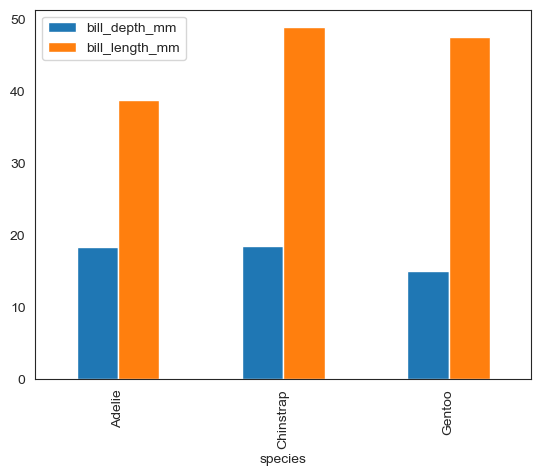

In [80]:
small.groupby('species').mean(numeric_only=True).plot(kind='bar')  # This is actually a pandas plot

# Group by numerical data using .cut() and .qcut()

In [81]:
df2['mass_group'] = pd.cut(df2['body_mass_g'], 
                          bins=[0, 3000, 4000, 5000, 10000],
                          labels=('small', 'medium','large', 'wow'))
df2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,mass_group
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,medium
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,medium
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,medium
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,medium


In [82]:
df2.groupby(pd.cut(df2['body_mass_g'], 
                          bins=[0, 3000, 4000, 5000, 10000],
                          labels=('small', 'medium','large', 'wow'))).mean(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
body_mass_g,,,,
small,38.1,17.2,186.0,2900.0
medium,41.5,18.1,190.6,3576.1
large,45.0,16.6,206.1,4512.6
wow,49.3,15.6,221.1,5501.6


In [83]:
df2.groupby(pd.qcut(df2["body_mass_g"],4, duplicates="drop")).mean(numeric_only = True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
body_mass_g,,,,
"(2699.999, 3550.0]",39.9,17.7,188.6,3297.8
"(3550.0, 4050.0]",43.2,18.5,192.7,3808.0
"(4050.0, 4750.0]",44.4,16.8,203.9,4430.6
"(4750.0, 6300.0]",48.5,15.5,219.3,5333.2


In [84]:
# Just a note....

In [85]:
df2.groupby(['species', 'island']).bill_length_mm.sum().reset_index()

,species,island,bill_length_mm
0,Adelie,Biscoe,1714.9
1,Adelie,Dream,2156.1
2,Adelie,Torgersen,1986.5
3,Chinstrap,Dream,3320.7
4,Gentoo,Biscoe,5843.1


In [86]:
# A different way to write the same code
df2.groupby(['species', 'island'])['bill_length_mm'].sum().reset_index()

,species,island,bill_length_mm
0,Adelie,Biscoe,1714.9
1,Adelie,Dream,2156.1
2,Adelie,Torgersen,1986.5
3,Chinstrap,Dream,3320.7
4,Gentoo,Biscoe,5843.1
